# <img style="float: left; padding-right: 20px; height: 70px" src="https://i.imgur.com/cMzxwTN.jpg"> Fundamentos  Básicos del Lenguaje Python


## **Trabajo final Solucion**


**Universidad Privada Boliviana**<br/>
**Experto en Ciencia de Datos con Python**<br/>
**Agosto 2023**<br/>

## 🎵 Quiz de Spotify
Responde las preguntas a continuación utilizando el conjunto de datos `spotify_artists.csv` proporcionado.

NOTA: Todas las respuestas deben basarse en el conjunto de datos proporcionado.

In [1]:
#importa la biblioteca pandas

import pandas as pd

In [2]:
# otras librerias a importar:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams["font.size"] = 15

In [3]:

#lee el archivo spotify_artists.csv en un dataframe

df = pd.read_csv("spotify_artists.csv")

In [4]:
# echa un vistazo rápido a los datos con df.head()
df.head()

,name,artist,year,duration_ms,popularity,energy,danceability,tempo
0,Singende Bataillone 1. Teil,Carl Woitschach,1928,158648,0,0.1950,0.708,118.469
1,"Fantasiestücke, Op. 111: Più tosto lento",Robert Schumann,1928,282133,0,0.0135,0.379,83.972
2,Chapter 1.18 - Zamek kaniowski,Seweryn Goszczyński,1928,104300,0,0.2200,0.749,107.177
3,Bebamos Juntos - Instrumental (Remasterizado),Francisco Canaro,1928,180760,0,0.1300,0.781,108.003
4,"Polonaise-Fantaisie in A-Flat Major, Op. 61",NaN,1928,687733,1,0.2040,0.210,62.149


### 1. ¿Cuántas canciones se encuentran en el dataframe?


In [5]:
# tu código aquí

df.shape


(163661, 8)

In [6]:

#Echa un vistazo a tu respuesta para ver si tiene sentido
print(df.shape[0])



163661


### 2. ¿Cuántos días tomaría escuchar todas las canciones en este conjunto de datos?

NOTA: Redondea la respuesta al número entero más cercano


In [7]:
#tu código aquí
answer2 = df.duration_ms.sum()*1/1000*1/3600*1/24

In [8]:
#Echa un vistazo a tu respuesta para ver si tiene sentido
print(int(answer2))


437


### 3. En el dataframe, ¿cuántas canciones tienen el título "Love" (coincidencia exacta)?


In [9]:


#tu código aquí
filter = df["name"]=="Love"
answer3 = df[filter].shape


In [10]:
#Echa un vistazo a tu respuesta para ver si tiene sentido
print(answer3[0])


18


### 4. ¿Qué artista creó la canción más popular titulada "Love"?

Para ordenar una serie por valores hemos utilizado:
`serie.sort_values()`

Para un dataframe, df.sort_values() requiere ademas la columna especifica utilizar como argumento: 

`df.sort_values(by='Nombre de la columna')`

Puedes ver la documentacion para obtener mas informacion [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html)


In [11]:
#tu código aquí
df_love = df[filter]
df_love.sort_values(by="popularity").iloc[-1].artist


'Lana Del Rey'

In [12]:
#Echa un vistazo a tu respuesta para ver si tiene sentido
print(df_love.sort_values(by="popularity").iloc[-1].artist)


Lana Del Rey


### 5. ¿En qué década se lanzaron la mayoría de las canciones?

SUGERENCIA: Deberás encontrar el número total de canciones lanzadas en cada década y proceder a partir de ahí.

NOTA: si tu respuesta es los 80, la respuesta debe ser 1980.

In [13]:
# tu código aquí
df["dec"]= df["year"]//10*10
df.head()
df["dec"].value_counts().sort_values()
...


Ellipsis

In [14]:
#Echa un vistazo a tu respuesta para ver si tiene sentido
print("La década se lanzaron la mayoría de las canciones es ")
print(df["dec"].value_counts().sort_values().index[-1])


La década se lanzaron la mayoría de las canciones es 
1990


### 6. ¿Qué columna tiene datos faltantes?
SUGERENCIA: Puedes revisar el metodo df.isnull() o df.isna()


In [15]:
#tu código aquí
columnas = df.columns
filt3= list(df.isnull().sum()!=0)

# filt3

In [16]:
#Echa un vistazo a tu respuesta para ver si tiene sentido
print("La columna que tiene datos faltantes es")
print(columnas[filt3][0])


La columna que tiene datos faltantes es
artist


#### Elimina todos los valores faltantes para responder al siguiente conjunto de preguntas.

Si el dataframe contiene valores faltantes, puedes eliminarlos utilizando el siguiente método:

`df.dropna(inplace=True)`

Este método busca elementos faltantes en el dataframe y, si encuentra alguno, elimina toda la fila correspondiente a la celda faltante.

Puedes encontrar más información en la documentación 
[here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna)

In [17]:
# tu código aquí
df.dropna(inplace = True)

### 7. Analisis del tempo de las canciones

Utilizar el comando `print(f"...")` donde corresponda para responder a las siguientes preguntas

Para los artistas con una popularidad mayor a 8 y cuyas canciones han sido lanzadas despues del 2015, encontrar la siguiente informacion:

- ¿Cuál es la canción más rápida en términos de tempo y en qué año fue lanzada?
- ¿Cuál es la canción más lenta en términos de tempo y en qué año fue lanzada?
- ¿Graficar el numero de canciones que fueron lanzadas por año y identificar cuál fue año con más canciones?


In [18]:
filter7_a1 = df["popularity"] >90
filter7_a2 = df["year"] > 2015
df_7 = df[filter7_a1 & filter7_a2]
# ¿Cuál es la canción más rápida en términos de tempo y en qué año fue lanzada?
answer_7_1 = df_7[["name","tempo","year"]].sort_values(by="tempo",ascending=False).iloc[0]
print(f"canción más rápida en términos de tempo: {answer_7_1['name']} y fue lanzada en {answer_7_1['year']}")

# ¿Cuál es la canción más lenta en términos de tempo y en qué año fue lanzada?
answer_7_2 = df_7[["name","tempo","year"]].sort_values(by="tempo",ascending=True).iloc[0]
print(f"canción más lenta en términos de tempo:  {answer_7_2['name']} y fue lanzada en {answer_7_2['year']}")
# ¿Graficar el numero de canciones que fueron lanzadas por año y identificar cuál fue año con más canciones?


canción más rápida en términos de tempo: Stuck with U (with Justin Bieber) y fue lanzada en 2020
canción más lenta en términos de tempo:  HIGHEST IN THE ROOM y fue lanzada en 2019


Text(0.5, 1.0, 'numero de canciones que fueron lanzadas por año')

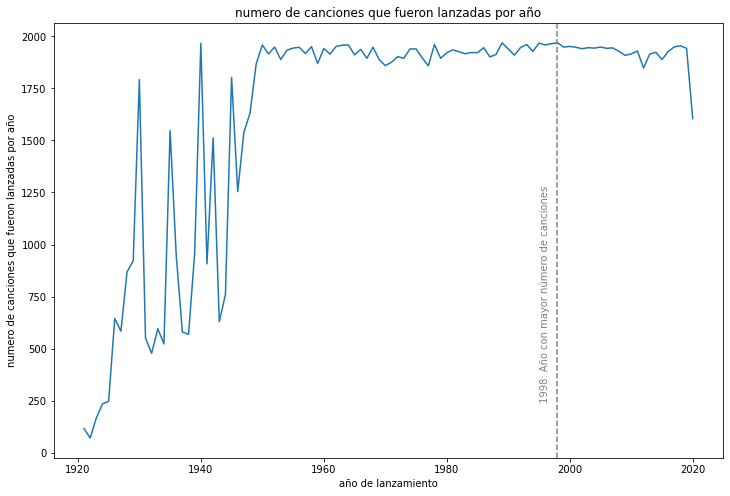

In [27]:
data_year = df["year"].value_counts().sort_index()
fig = plt.figure(figsize=(12,8))
plt.plot(data_year.index,data_year.values)
plt.axvline(x=data_year.idxmax(), color='grey', linestyle='--')
leg_t = str(data_year.idxmax())+': Año con mayor número de canciones'
plt.text(data_year.idxmax()-3, 250, leg_t, color='grey', rotation=90)

plt.ylabel("numero de canciones que fueron lanzadas por año")
plt.xlabel("año de lanzamiento")
plt.title("numero de canciones que fueron lanzadas por año")


### 8. Analisis del tiempo de duracion de las canciones
Utilizar el comando `print(f"...")` para responder a las siguientes preguntas

- ¿Cuál es la canción más larga en términos de duración en milisegundos y quién es el artista que la interpreta?

- ¿Cuál es la canción más popular en términos de valor de popularidad y en qué año fue lanzada?

In [20]:
#tu código aquí

df8 =df[["artist","duration_ms","name"]].sort_values(by="duration_ms",ascending=False)
print(f"la canción más larga es '{df8['name'].iloc[0]}'  y el artista que la interpreta es '{df8['artist'].iloc[0]}'")

df8_2 =df[["year","popularity","name"]].sort_values(by="popularity",ascending=False)
print(f"la canción más popular es '{df8_2['name'].iloc[0]}'  y el año que fue lanzada es '{df8_2['year'].iloc[0]}'")




la canción más larga es 'Brown Noise - 90 Minutes'  y el artista que la interpreta es 'Sound Dreamer'
la canción más popular es 'death bed (coffee for your head) (feat. beabadoobee)'  y el año que fue lanzada es '2020'


### 9. ¿Cuál es la canción más enérgica de Michael Jackson?

In [21]:
#tu código aquí
filtro9 = df["artist"]=="Michael Jackson"
print("la canción más enérgica de Michael Jackson es:")
print(df[filtro9].sort_values(by="energy",ascending=False).iloc[0]["name"])

la canción más enérgica de Michael Jackson es:
Smooth Criminal - 2012 Remaster


### 10 ¿Qué artista ha lanzado la mayor cantidad de canciones desde 1960?


In [22]:
# tu código aquí
filtro10 =  df["year"]>=1960
artist_10 = df[filtro10].groupby("artist")["name"].count().sort_values(ascending=False).index[0]
print("Artista que ha lanzado la mayor cantidad de canciones desde 1960 es",artist_10)

Artista que ha lanzado la mayor cantidad de canciones desde 1960 es Bob Dylan


### 11 Para el artista de la pregunta anterior, ¿cuál es la canción más popular?

In [23]:
# tu código aquí
filtro11 = df["artist"]==artist_10 
name11 = df[filtro11].sort_values(by="popularity",ascending=False).iloc[0]["name"]
print(f"La cancion mas popular de {artist_10} es '{name11}'")

La cancion mas popular de Bob Dylan es 'Knockin' On Heaven's Door'


### 12. Crear un playlist con las canciones mas populares

Crea una `lista` de reproducción con la canción más popular de cada año desde 1980 hasta 2020.

El resultado debe ser de tipo List con 41 valores de tipo str (una canción para cada año)
p.ej. ['cancion1', 'cancion2', 'cancion3', ...]
NOTA: En caso de empates, elige la canción con el valor más alto de energy.

In [24]:
# Con un for loop:
# Crear una lista para guardar las canciones
list_canciones = []
# Realizar un for loop para iterar en cada uno de los  años

for year_it in range(1980, 2021):
    # crear un filtro que seleccione el año que indica year_it
    songs_year = df[df["year"] == year_it]
    # obtener la cancion mas popular de ese año
    best_popularity = songs_year["popularity"].max()
    # asumir que existe empate y seleccionar la cancion con mas energia
    # crear un filtro que encuentre las canciones con la popularidad encontrada
    best_songs = songs_year[songs_year["popularity"] == best_popularity]
    best_energy_song = best_songs.sort_values(by="energy")["name"].iloc[-1]
    list_canciones.append(best_energy_song)


# los primeros 10 elementos de esta lista
list_canciones[0:10]

['Back In Black',
 "Don't Stop Believin'",
 'Africa',
 'Every Breath You Take',
 'Wake Me up Before You Go-Go',
 'Take on Me',
 "Livin' On A Prayer",
 'I Wanna Dance with Somebody (Who Loves Me)',
 'Fast Car',
 "Free Fallin'"]

In [ ]:
# solucion alternativa con list comprenhension
list_canciones2 = [
    df[(df["year"] == year_it) & (df["popularity"] == df[df["year"] == year_it]["popularity"].max())]
    .sort_values(by="energy")["name"].iloc[-1]
    for year_it in range(1980, 2021)
]
# los primeros 10 elementos de esta lista
list_canciones2[0:10]

['Back In Black',
 "Don't Stop Believin'",
 'Africa',
 'Every Breath You Take',
 'Wake Me up Before You Go-Go',
 'Take on Me',
 "Livin' On A Prayer",
 'I Wanna Dance with Somebody (Who Loves Me)',
 'Fast Car',
 "Free Fallin'"]

### 13 ¿Cómo se distribuye la popularidad de las canciones en forma de histograma?
Crea un grafico para responder esta pregunta


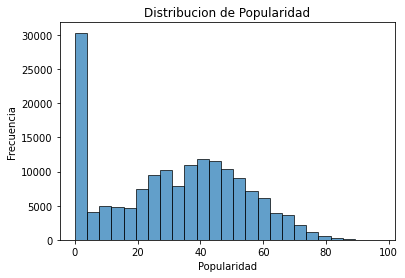

In [ ]:
# tu código aquí
plt.hist(df["popularity"],bins=25,edgecolor= "k",alpha=0.7)
plt.title("Distribucion de Popularidad")
plt.ylabel("Frecuencia")
plt.xlabel("Popularidad")
plt.show()

### 14 ¿existe una correlación entre la duración de las canciones y su nivel de energía? Representa esta relación en un scatter plot.
Crea un grafico para responder esta pregunta

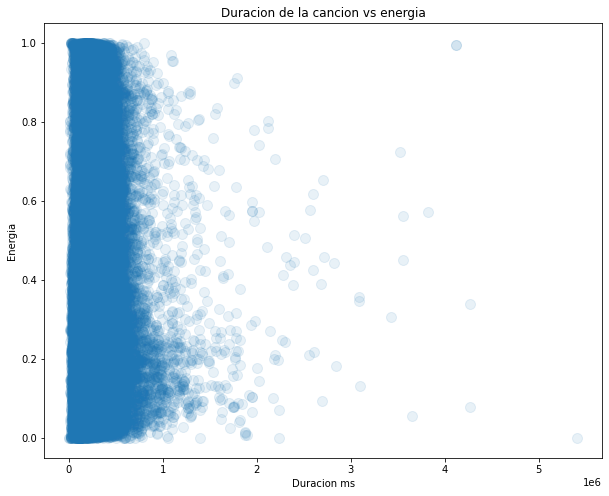

In [ ]:
# tu código aquí
plt.figure(figsize=(10,8))
plt.scatter(df["duration_ms"],df["energy"], s= 100, alpha=0.1)
plt.xlabel("Duracion ms")
plt.ylabel("Energia")
plt.title("Duracion de la cancion vs energia")
plt.show()

### 15 ¿Cuál es la distribución de la danceability de las canciones en función del año de lanzamiento? 
Crea un gráfico de barras para mostrar esta distribución.

Text(0.5, 1.0, 'Danceability vs decada de lanzamiento')

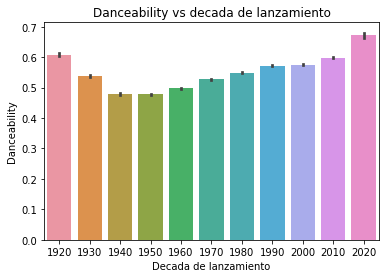

In [ ]:
import seaborn as sns
sns.barplot(x="dec",y="danceability",data=df)
plt.xlabel("Decada de lanzamiento")
plt.ylabel("Danceability")
plt.title("Danceability vs decada de lanzamiento")


### 16 ¿Cómo varía el tempo de las canciones a lo largo de los años?
Representa esta variación utilizando un gráfico de línea.


Text(0.5, 1.0, 'tempo vs decada de lanzamiento')

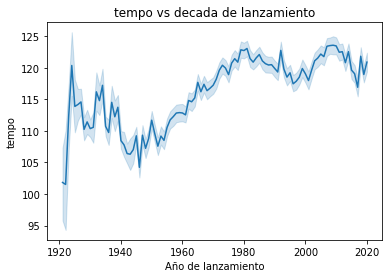

In [ ]:
# tu código aquí
sns.lineplot(x="year", y="tempo", data=df)
plt.xlabel("Año de lanzamiento")
plt.ylabel("tempo")
plt.title("tempo vs decada de lanzamiento")

### 17 ¿Cuál es la relación entre la popularidad y la energía de las canciones?
Crea un scatter plot para visualizar esta relación.


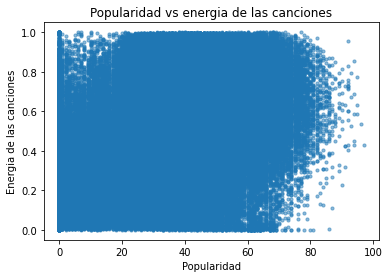

In [ ]:
# tu código aquí
plt.scatter(df["popularity"], df["energy"], alpha=0.5,s=10)
plt.xlabel("Popularidad")
plt.ylabel("Energia de las canciones")
plt.title("Popularidad vs energia de las canciones")
plt.show()

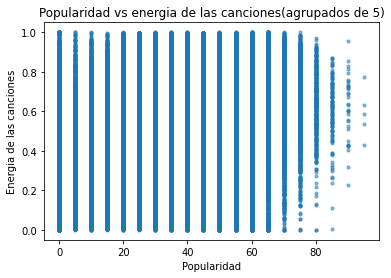

In [ ]:
# agrupando popularidad en grupos de 5
plt.scatter(df["popularity"]//5*5, df["energy"], alpha=0.5,s=10)
plt.xlabel("Popularidad")
plt.ylabel("Energia de las canciones")

plt.title("Popularidad vs energia de las canciones(agrupados de 5)")
plt.show()

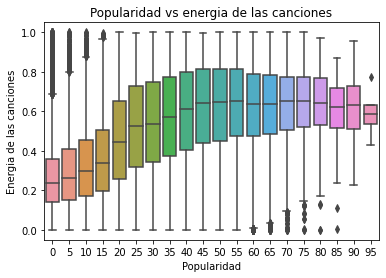

In [ ]:
# mostrando este grafico en un box plot:
df["pop_en5"] = df["popularity"]//5*5
sns.boxplot(x="pop_en5", y= "energy", data =df)
plt.xlabel("Popularidad")
plt.ylabel("Energia de las canciones")
plt.title("Popularidad vs energia de las canciones")
plt.show()

### 18 ¿Cuál es la tendencia de cambio en la duración de las canciones a lo largo de los años? 
Utiliza un gráfico de línea para mostrar esta tendencia.

Text(0.5, 1.0, 'Duracion vs año de lanzamiento')

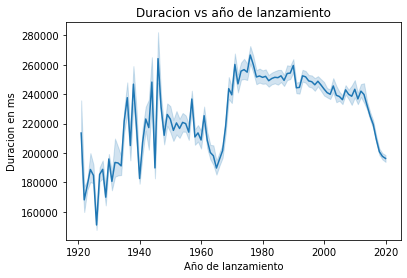

In [ ]:
# tu código aquí
sns.lineplot(x="year", y="duration_ms", data=df)
plt.xlabel("Año de lanzamiento")
plt.ylabel("Duracion en ms")
plt.title("Duracion vs año de lanzamiento")

### 19  ¿Cuál es la energía promedio de todas las canciones de 'Michael Jackson'?
Para obtener el promedio de los valores en una columna de tipo numerico, puede utilizar el metodo

`df["nombre de la columna"].mean()`

In [ ]:
# tu código aquí
filtro19 = df["artist"]=="Michael Jackson"
prom_mj = df[filtro19]["energy"].mean()
print(f"La energía promedio de todas las canciones de 'Michael Jackson' es {prom_mj:.2f}")

La energía promedio de todas las canciones de 'Michael Jackson' es 0.69


### 20 ¿Cuántos artistas únicos están representados en el dataframe?
Para contar los elementos unicos en un dataframe puedes utilizar el metodo:

`df["nombre de la columna"].unique()`


In [ ]:
# tu código aquí
print("La cantidad de artistas únicos están representados en el dataframe es", df["artist"].nunique())

La cantidad de artistas únicos están representados en el dataframe es 19695
